In [1]:
setwd("~/projects/next_gen_attribution/src/analysis/R/pg")

source("~/R_connector/libraries.R")
#mozart <- connToEDW(dataBase = "Mozart", connType = 'normal', user = 'pgurican', pass=trimws(read_file("~/R_connector/p.txt")))
hopper <- connToEDW(dataBase = "Hopper", connType = 'normal', user = 'pgurican', pass=trimws(read_file("~/R_connector/p.txt")))

Loading required package: DBI
Loading required package: rJava
------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [94]:
round(c(583706, 34009, 549697, 7181, 556878, 891596)/1482483*100, 1)

[1] 39.4  2.3 37.1  0.5 37.6 60.1

In [73]:
cguid_xid <- dbGetQuery(conn = hopper, "select cguid, group_id, n_imps, cast(incdata_id as varchar(21)) from P_attribution_T.epn_cguid_to_xid_multiplicity")

In [74]:
cguid_xid$group_id <- as.factor(cguid_xid$group_id)

In [75]:
head(cguid_xid)

cguid,group_id,n_imps,incdata_id
f8e6c40f1540a7ea0af65576fe23110c,1,1,100000000001221685475
ec44473c15b0a99220d31392e5ac7ead,0,2,100000000001068394225
ca95d2b014d0a5f145112ae1f5d767f1,0,1,100000000000038830043
0b3a07ed1490a56b24074e77fbb28253,1,1,100000000000877813519
fa7001291580a99b5f536fbded5f275e,0,1,100000000001267804497
c45d422915b0aa48ee54ce8ef5677e30,0,1,100000000000045988994


In [6]:
cguid_uid <- dbGetQuery(conn = hopper, "select cguid, user_id, group_id, count(*) as cnt from P_FLEX_POOL_T.RAS_sessions group by 1,2,3")

In [27]:
head(cguid_uid %>% filter(!is.na(user_id)))

cguid,user_id,group_id,cnt
b3430d4315d0ab6051a767e5f5f03e58,1679438143,1,2
3f37eab615b0a7e136f626f2feb1c3d3,1057760244,0,85
c46d19161430a5f164d29002fb6e67f4,1433934665,1,3
805e866015d0ab648cf5a337ff2f277c,592639541,1,17
73a1101e15d0ab14ed830208f25145cf,781710194,0,37
22d4f3c61580a887cc3726d9fa8fdc75,25899920,0,219


In [36]:
contaminated <- intersect((cguid_uid %>% filter(group_id == 0))$user_id,
          (cguid_uid %>% filter(group_id == 1))$user_id)

In [37]:
cguid_uid %<>% filter(!is.na(user_id)) %>% filter(!(user_id %in% contaminated))

In [41]:
nrow(cguid_uid)

[1] 593173

In [14]:
library(scales)


Attaching package: ‘scales’

The following object is masked from ‘package:readr’:

    col_factor



In [76]:
data <- cguid_xid %>% filter(group_id != "-999") %>% group_by(group_id, incdata_id) %>% summarise(cnt = n())

In [77]:
data

group_id,incdata_id,cnt
0,100000000000000000002,4
0,100000000000000000003,3
0,100000000000000000004,10
0,100000000000000000005,6
0,100000000000000000006,4
0,100000000000000000007,4
0,100000000000000000008,14
0,100000000000000000009,5
0,100000000000000000010,6
0,100000000000000000011,9


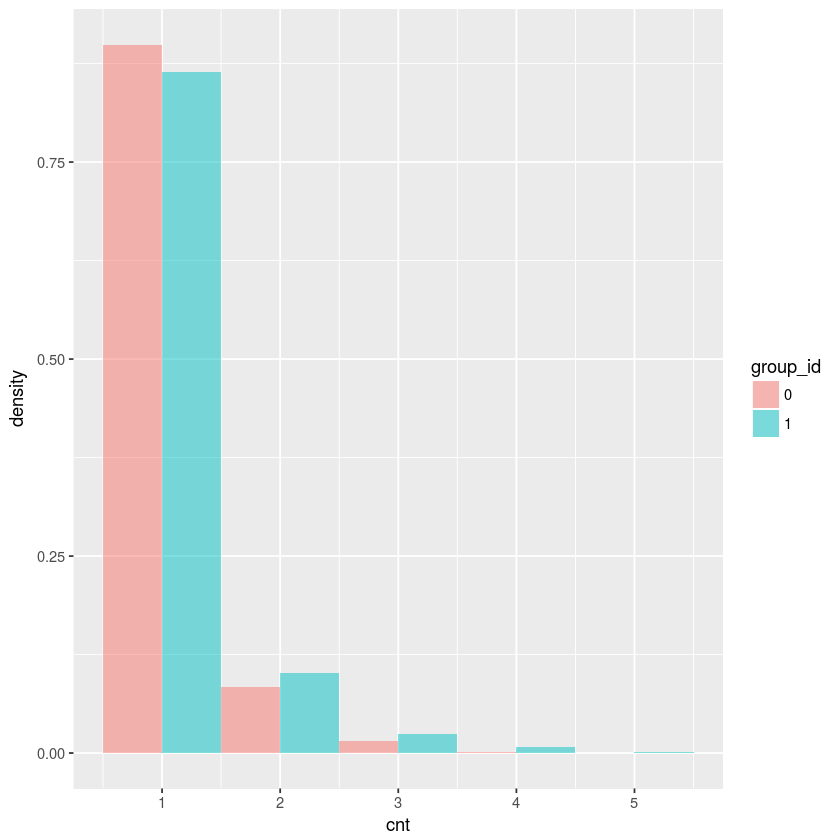

In [91]:
ggplot(data %>% filter(cnt <= quantile(cnt, .999))) +
    geom_histogram(aes(x = cnt, 
                       y = ..density.., 
                       group = group_id, 
                       fill = group_id),
                   alpha= 0.5,
                   position="dodge",
                  bins = 5)

In [89]:
quantile(data$cnt, .999)

99.9% 
    5

In [79]:
summary((data %>% filter(group_id == "0"))$cnt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.124   1.000 685.000 

In [80]:
summary((data %>% filter(group_id == "1"))$cnt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.183   1.000 922.000 

In [81]:
length(unique(data$incdata_id))

[1] 2282106

In [82]:
length(unique(cguid_xid$cguid))

[1] 583706